In [1]:
%matplotlib inline

In [2]:
import os
import fnmatch
import numpy as np
import tensorflow as tf

from tensorflow.contrib.data import Dataset, Iterator
from tensorflow.python.ops import math_ops
from matplotlib import pyplot as plt

from models.alexnet import AlexNet
from models.vgg import VGG
from models.vgg_slim import VGGslim
from models.inception_v3 import InceptionV3
from helper.imagenet_classes import class_names

In [3]:
# Set Model
model_def = InceptionV3

In [4]:
# Load an image
img_path      = './images/zebra.jpeg'
img_file      = tf.read_file(img_path)
img_decoded   = tf.image.decode_jpeg(img_file, channels=3)
img_processed = model_def.image_prep.preprocess_image(img_decoded, model_def.image_size, model_def.image_size)

# Change the tensor shape from [224, 224, 3] -> [1, 224, 224, 3]
net_input = tf.expand_dims(img_processed, 0)

In [5]:
# Setup the pipline
model = model_def(net_input)
scores = model.get_prediction()
softmax = tf.nn.softmax(scores)

In [6]:
with tf.Session() as sess:
    # Initialize all variables and the iterator
    sess.run(tf.global_variables_initializer())
    # Load the pretrained weights into the model
    model.load_initial_weights(sess)
        
    # Run the classification
    img, img_processed, probs = sess.run([img_decoded, img_processed, softmax])

INFO:tensorflow:Restoring parameters from ./weights/inception_v3.ckpt


INFO:tensorflow:Restoring parameters from ./weights/inception_v3.ckpt


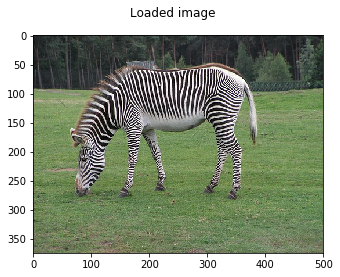

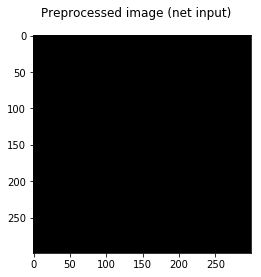

> zebra -> 0.9617


In [7]:
    plt.figure()
    plt.imshow(img.astype(np.uint8))
    plt.suptitle("Loaded image")
    plt.show()
    
    plt.figure()
    plt.imshow(img_processed.astype(np.uint8))
    plt.suptitle("Preprocessed image (net input)")
    plt.show()
    
    offset = len(class_names) - len(probs[0])
    best_index = np.argmax(probs)
    print "> " + class_names[best_index+offset] + " -> %.4f" %probs[0][best_index]